# Homework - 2

##  Summary
This report utilizes the Twitter API to gather tweet data filtered by "avocado" and then analyze the data. Section 1 is focused on getting the data and section 2 is about analyzing the data. I would like to identify what are the attitudes of tweets with the keyword "avocado" by calculating the polarity value for each tweet. 

### Section 1 - Getting the data

#### Importing packages

In [2]:
pip install -U textblob

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import webbrowser
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


#### Authentication

In [8]:
consumer_key = os.getenv('consumer_key')
consumer_secret = os.getenv('consumer_secret')

In [9]:
callback_uri = 'oob' # https://cfe.sh/twitter/callback

In [10]:
auth = tw.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=rVtvCAAAAAABINLYAAABdQj5l2s


In [11]:
webbrowser.open(redirect_url)

True

In [13]:
user_pint_input = input("What's the pin value? ")

What's the pin value? 2833704


auth.get_access_token(user_pint_input)

In [15]:
api = tw.API(auth, wait_on_rate_limit=True)

In [16]:
me = api.me()

#### Grab and Clean data

In [17]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing 
    #(i.e. it will remove the URL from the string).

    #Parameters
    #----------
    #txt : string
     #   A text string that you want to parse and remove urls.

    #Returns
    #-------
    #The same txt string with url's removed.
    

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


##### Query of "avocado" tweets (up to 1000) since the beginning of the year

In [18]:
# Create a custom search term and define the number of tweets
search_term = "#avocado -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


#### Building dataframe

In [20]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]


(0.275,
 TextBlob("Its the first time that this work has been done with avocado shoot tips so its quite exciting University o"))

In [21]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.275,
 'Its the first time that this work has been done with avocado shoot tips so its quite exciting University o']

In [35]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])



#### Dataframe saved as csv

In [34]:
sentiment_df.to_csv("data/tweet_sentiment.csv")

### Section - 2  Analyzing the data

In [36]:
sentiment_df.head()

,polarity,tweet
0,0.275,Its the first time that this work has been don...
1,0.175,Is there such a thing as too much avocado We d...
2,0.000,Dont hate on fatAvocado salmon walnuts and oli...
3,0.000,Egg in a Hole egginahole hamptons breakfast eg...
4,0.000,Avocado the Anti Inflammatory Diseases Functio...


In [31]:
sentiment_df.describe

<bound method NDFrame.describe of      polarity                                              tweet
0    0.275000  Its the first time that this work has been don...
1    0.175000  Is there such a thing as too much avocado We d...
5    0.136364  A new favourtite on our breakfast menu Smashed...
6   -0.200000  Summer Green Salad with Apple Cider Vinegrette...
8    0.128571  Gabrieaus Bistro will be closed until 1pm this...
..        ...                                                ...
474  0.084821  Cheeky little special this week Smashed Avocad...
475  0.050000  Tt has planned to expand the pilot implementat...
476  0.400000  My second meal after surgery thanks to brother...
477  0.500000   Raise your hand if you love AVOCADO avocado love
478  0.500000  Weve missed being able to get out on avocado o...

[320 rows x 2 columns]>

#### Mean polarity of avocado tweets = 0.319645

In [33]:
sentiment_df.mean()

polarity    0.319645
dtype: float64

#### Histogram of polarity

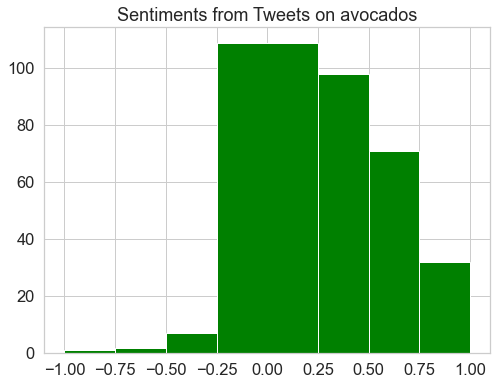

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on avocados")
plt.show()


In [24]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]


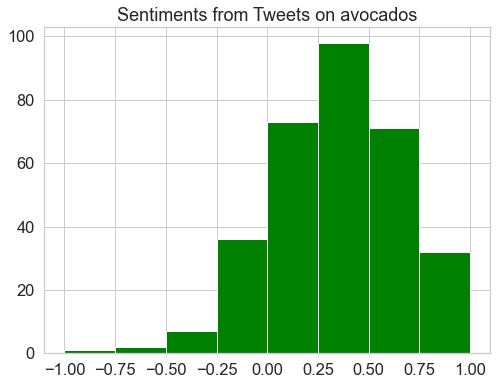

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on avocados")
plt.show()


### Conclusion

My assumption is people would have a more positive attitude about avocados if they were tweeting about avocados. Based on the dataset and analysis, people who tweet about avocados do indeed have a more favorable attitude of avocados, with mean value of 0.319645.  The next step would be to understand where tweets are concentrated geographically; there by connecting consumers to sellers in a more target manner.

##### Big thanks to Earth Data Science lesson 5. 
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/analyze-tweet-sentiment-in-python/